# Script for choosing the best number of steps for the svd model


In [1]:
from os import path
import numpy as np
import matplotlib.pyplot as plt

import sys
parent_path = path.abspath('..')
sys.path.insert(0, parent_path)
import dfFunctions
from utils import rmse
import recommender as re


path = parent_path + '/movielens/ml-1m/ratings.dat'
df = dfFunctions.load_dataframe(path)
model = re.SVDmodel(df, 'user', 'item', 'rating', 'svd')

regularizer_constant = 0.0003
learning_rate = 0.001
batch_size = 700
momentum_factor = 0.926
dimension = 12

In [ ]:
all_steps = np.array(list(range(1,91)))*1000
results = []
times = []

for i,num_steps in enumerate(all_steps):
    print("\niteration ({}/89)".format(i))
    model.training(dimension,
               regularizer_constant,
               learning_rate,
               momentum_factor,
               batch_size,
               num_steps,
               False)
    users, items, rates = model.test_batches.get_batch()
    predicted_ratings = model.prediction(users,items)
    result = rmse(predicted_ratings, rates)
    results.append(result)
    times.append(model.duration)

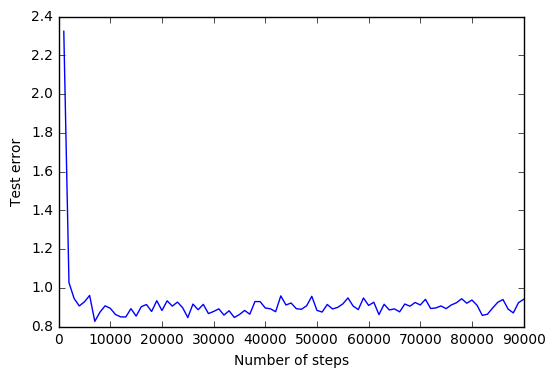

In [3]:
plt.plot(all_steps,results)
plt.xlabel('Number of steps')
plt.ylabel('Test error')
plt.show()

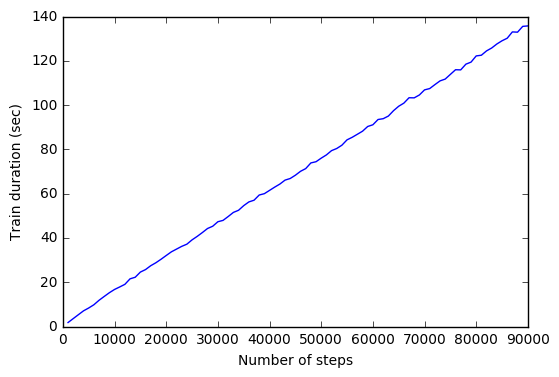

In [4]:
plt.plot(all_steps,times)
plt.xlabel('Number of steps')
plt.ylabel('Train duration (sec)')
plt.show()

In [5]:
all_steps = list(all_steps)
best_result = min(list(zip(results,all_steps,times)))
result_string = """In an experiment with number of steps from {0} to {1}
the best number of steps is {2} with error {3}.
Using this number the training will take {4} seconds""".format(all_steps[0],
                                                             all_steps[-1:][0],
                                                             best_result[1],
                                                             best_result[0],
                                                             best_result[2])
print(result_string)

In an experiment with number of steps from 1000 to 90000
the best number of steps is 7000 with error 0.8264355659484863.
Using this number the training will take 11.84 seconds


In [6]:
print(np.mean(results),np.std(results))

0.917437 0.152334


In [7]:
print(np.mean(times),np.std(times))

69.7133333333 38.9414007338
